# Graham scan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def plotting_hull(points, convex_hull):
    """
    Scatterplot of points and convex hull
    
    Parameters
    ----------
    points : pd.DataFrame
        DataFrame with x and y coordinates for all points
    convex_hull : pd.DataFrame
        DataFrame with x and y coordinates for all points \
        belonging to the convex hull
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data=points,
                x='x',
                y='y',
                color='white',
                linewidth=1,
                edgecolors='black',
                label='Inner points')
    plt.scatter(data=convex_hull,
                x='x',
                y='y',
                s=50,
                color='black',
                label='Convex hull points')
    plt.plot(convex_hull.x, convex_hull.y, color='black', label='Convex hull')
    plt.legend()
    plt.show()

In [34]:
def cross_product(o, a, b):
    """
    Compute the cross product of  position of B compared to OA.
    Returns True if OA and OB form a positive angle
    
    Parameters 
    ----------
    o : pd.Series
        Coordinates ('x', 'y') of point in hull
    a : pd.Series
        Coordinates('x', 'y') of current end_point
    b : pd.Pandas
        Tuple ('x', 'y') of considered point
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

In [35]:
def angle(p1, p2):
    """
    Computes and returns angle between p1 and p2
    """
    return np.rad2deg(np.arctan2(p2.y - p1.y, p2.x - p1.x))

In [36]:
def graham_scan(points):
    max_y_index = points.y.idxmin()
    start_point = points.loc[max_y_index]
    #points = points.drop(max_y_index)
    points['slope'] = points.apply(lambda p : angle(start_point, p), axis=1)
    points = points.sort_values(by='slope')

    convex_hull = []
    for p in points.itertuples(index=False):
        while len(convex_hull) >= 2 and cross_product(convex_hull[-2], convex_hull[-1], p) < 0:
            convex_hull.pop()
        convex_hull.append(list(p))
    
    points = points.append(start_point)
    convex_hull = pd.DataFrame(convex_hull, columns=points.columns)
    convex_hull = convex_hull.append(start_point)
    
    # scatterplot of dataset and convex hull
    plotting_hull(points, convex_hull)

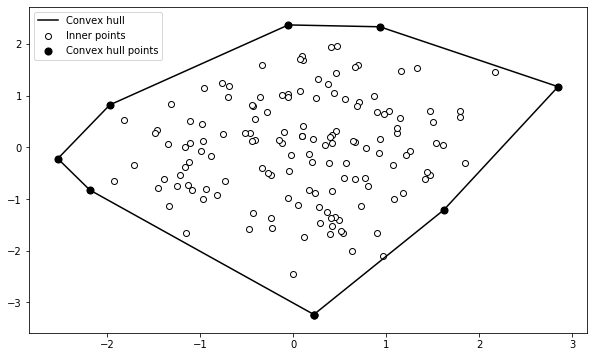

In [37]:
points = pd.DataFrame(np.random.normal(size=(150, 2)), columns=['x', 'y'])
graham_scan(points)